In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv(r'D:\Stu\Data Science\Exercises Regression\3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0, 'French':1, 'German':2})

In [5]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [6]:
x=data_mapped.iloc[:,3:4]

In [7]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [8]:
kmeans=KMeans(3)

In [9]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [14]:

data_with_clusters=data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


<function matplotlib.pyplot.show(*args, **kw)>

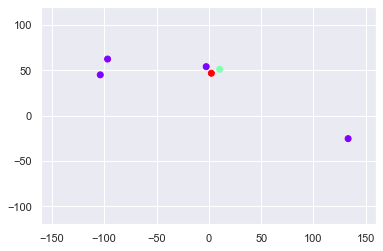

In [15]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-160,160)
plt.ylim(-120,120)
plt.show